# A/B тестирование
***

# Описание проекта

Приоритизация гипотез, запуск A/B-теста и анализ результатов.

# Оглавление<a class='anchor' id='TOC'></a>

* **[I. Подготовка к анализу](#1)**
    - [1) Импортируем библиотеки, объявим классы HypoPrioritize и Reporter для анализа](#1_1)
    - [Вывод](#1_conclusion)
<br></br>
* **[II. Приоритизация гипотез](#2)**
    - [1) Применим фреймворки ICE и RICE](#2_1)
    - [2) Проверим гипотезы по методу ICE](#2_2)
    - [2) Проверим гипотезы по методу RICE](#2_3)
    - [Выводы по итогам приоритезации](#2_conclusion)
<br></br> 
* **[III. Анализ A/B-теста](#3)**
    - [1) Построим графики кумулятивных метрик](#3_1)
    - [2) Исследуем количество заказов на пользователя и стоимости заказов](#3_2)
    - [Выводы по итогам анализ А/В-теста](#3_conclusion)
<br></br>
* **[Чек-лист](#checklist)**

# I. Подготовка к анализу<a class='anchor' id='1'></a>

## 1) Импортируем библиотеки, объявим классы HypoPrioritize и Reporter для анализа<a class="anchor" id="1_1"></a>

In [1]:
import pandas as pd

from solver.hypo import HypoPrioritization
from solver.ab_reporter import ABReporter

pd.options.display.max_colwidth = 150
pd.set_option('display.precision', 2)
pd.set_option('display.float_format',  '{:.2f}'.format)

[В оглавление](#TOC)

# II. Приоритизация гипотез<a class='anchor' id='2'></a>

## 1) Применим фреймворки ICE и RICE<a class="anchor" id="2_1"></a>

In [2]:
prioritization = HypoPrioritization('datasets/hypothesis.csv')

In [3]:
scores = prioritization.get_priority()

&#9889; **Вывод:** девять гипотез, в отношении каждой посчитали приоритет по методам ICE и RICE.

## 2) Проверим гипотезы по методу ICE<a class="anchor" id="2_2"></a>

In [4]:
scores.sort_values(by='ICE', ascending=False).style.background_gradient(cmap="BuGn", subset=['ICE'])

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


&#9889; **Выводы**

По методу ICE наиболее перспективные гипотезы:
- "Запустить акцию, дающую скидку на товар в день рождения" (№ 8, 16.20), 
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (№ 0, 13.33)
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (№ 7, 11.20)

## 3) Проверим гипотезы по методу RICE<a class="anchor" id="2_3"></a>

In [5]:
scores.sort_values(by='RICE', ascending=False).style.background_gradient(cmap="BuGn", subset=['RICE'])

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


&#9889; **Выводы**

По методу RICE наиболее перспективные гипотезы:
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (№ 7, 112.00), 
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" (№ 2, 56.00)
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (№ 0, 40.00)
- "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" (№ 6, 40.00)

## Выводы по итогам приоритезации<a class="anchor" id="2_conclusion"></a>

1. Охват пользователей (Reach) повлиял на приоритизацию гипотез при применении RICE вместо ICE:
    - две (№ 7, 0) из трех самых прироритетных гипотез по методу ICE вошли в тройку после пересчета по методу RICE - гипотеза о добавлении формы подпсики и добавлении двух каналов; гипотеза о запуске акции, дающей скидку на день рождения переместилась с вершины списка в середину (одинаковое число баллов по RICE и ICE - 16.20),
    - гипотеза № 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"  - получила наибольшую оценку по методу RICE- 112 баллов (ICE - 11.20),
    - гипотеза № 2 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" получила вдвое меньше баллов по методу RICE, чем гипотеза о форме подписок (56 против 112).
2. Неизвестно как именно сформирована шкала охвата пользователей, поэтому, исходя из представленных данных, до уточнения информации о шкале охвата, с осторожностью можно утверждать, что гипотеза № 7 о добавлении формы подиски является приоритетной, поскольку получила и максимальную оценку по RICE (112), и достаточно высокую по ICE (11.20 из 16.20 - вошла в тройку, на 3.2 балла выше следующей).

[В оглавление](#TOC)

# III. Анализ A/B-теста<a class='anchor' id='3'></a>

## 1) Построим графики кумулятивных метрик<a class="anchor" id="3_1"></a>

### - инициализируем класс для анализа

In [6]:
reporter = ABReporter('datasets/visitors.csv', 'datasets/orders.csv')

### - посчитаем кумулятивные метрики

In [7]:
cumulated = reporter.grouped_summary()

In [8]:
cumulated

,date,group,orders,buyers,revenue,revenue_cm,orders_cm,buyers_cm,visitors,visitors_cm,conversion_cm
0,2019-08-01,A,24,20,148579,148579,24,20,719,719,0.03
1,2019-08-01,B,21,20,101217,101217,21,20,713,713,0.03
2,2019-08-02,A,20,19,93822,242401,44,39,619,1338,0.03
3,2019-08-02,B,24,23,165531,266748,45,43,581,1294,0.03
4,2019-08-03,A,24,24,112473,354874,68,63,507,1845,0.04
...,...,...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,20,20,231130,5559398,596,584,531,17708,0.03
58,2019-08-30,A,11,10,86460,4022970,545,531,490,18037,0.03
59,2019-08-30,B,24,24,215233,5774631,620,608,490,18198,0.03
60,2019-08-31,A,12,12,61833,4084803,557,543,699,18736,0.03


### - построим графики

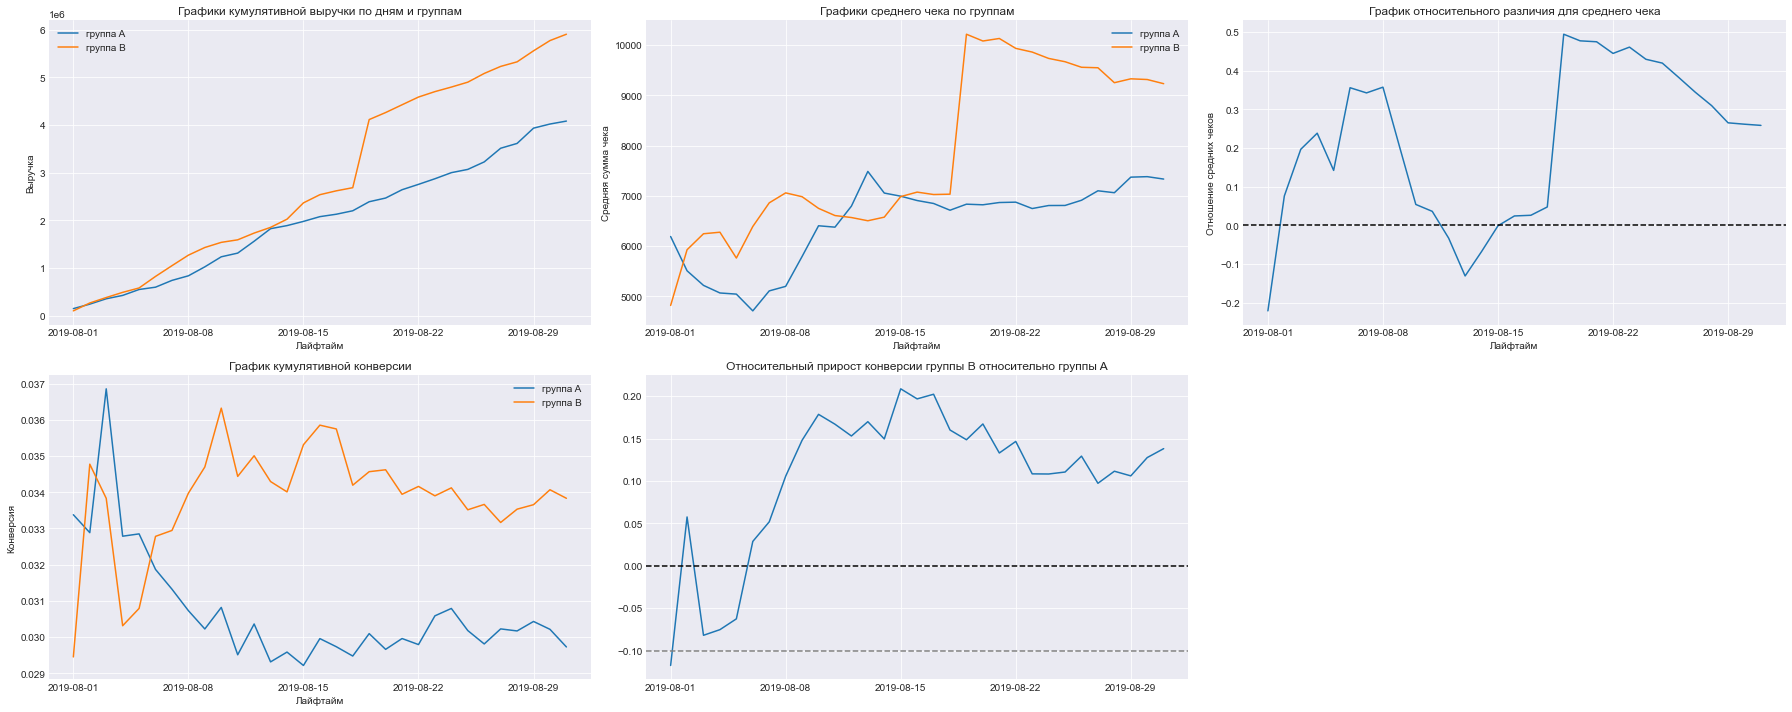

In [9]:
reporter.plot_cumulative_metrics()

[В оглавление](#TOC)

## 2) Исследуем количество заказов на пользователя и стоимости заказов<a class="anchor" id="3_2"></a>

### - количество заказов на пользователя

In [10]:
orders_by_users = reporter.orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


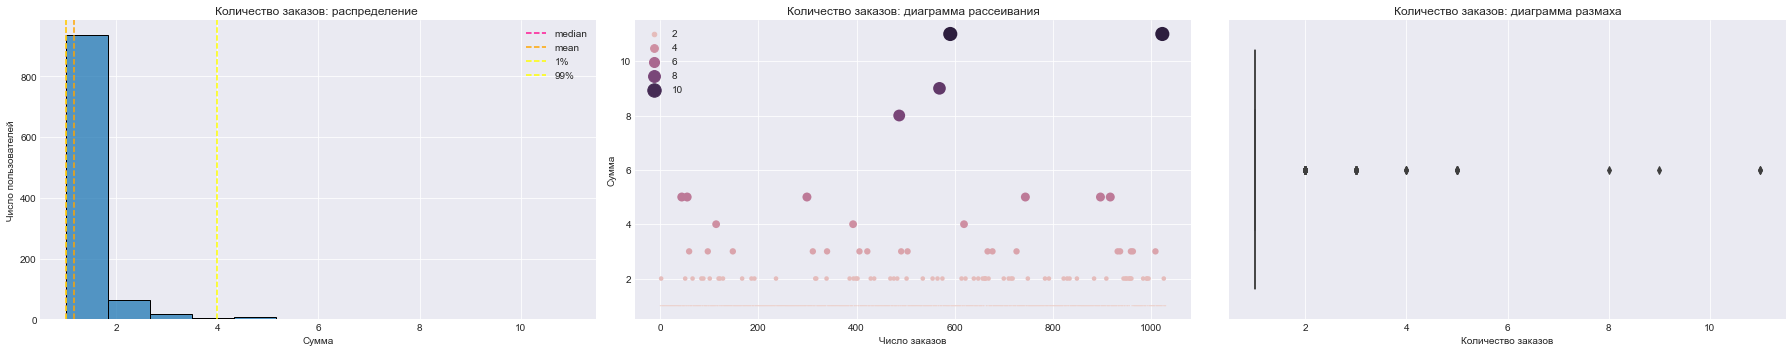

In [11]:
reporter.plotter(orders_by_users, 'orders', 'Количество заказов')

In [12]:
orders_by_users[['orders']].describe(percentiles=[.25, .5, .75, .95, .99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
orders,1031.00,1.16,0.72,1.00,1.00,1.00,1.00,2.00,4.00,11.00


[В оглавление](#TOC)

### - стоимости заказов

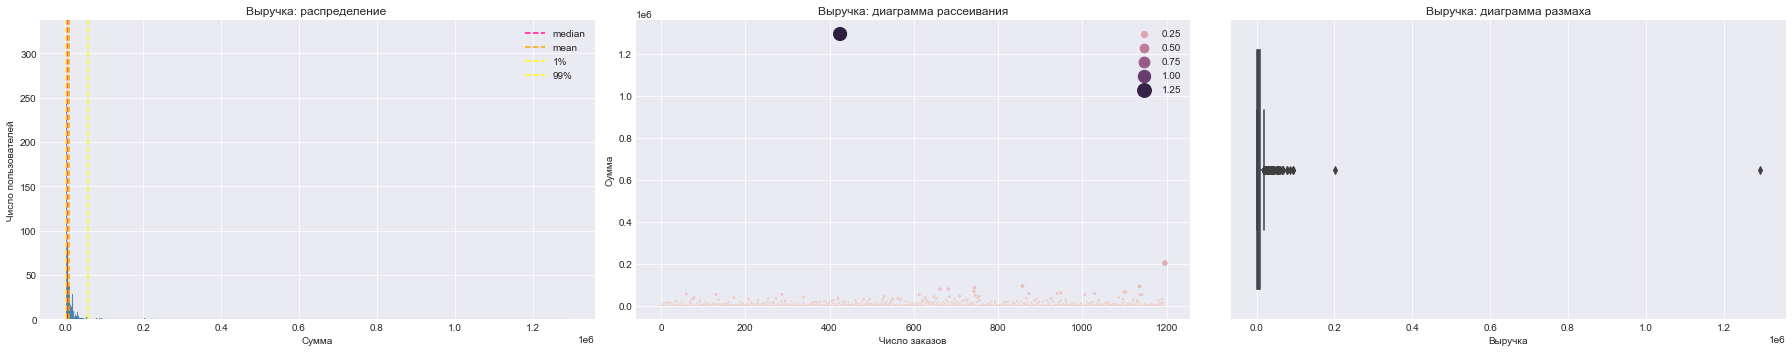

In [13]:
reporter.plotter(reporter.orders, 'revenue', 'Выручка')

In [14]:
reporter.orders[['revenue']].describe(percentiles=[.25, .5, .75, .95, .99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
revenue,1197.00,8348.01,39191.13,50.00,1220.00,2978.00,8290.00,28000.00,58233.20,1294500.00


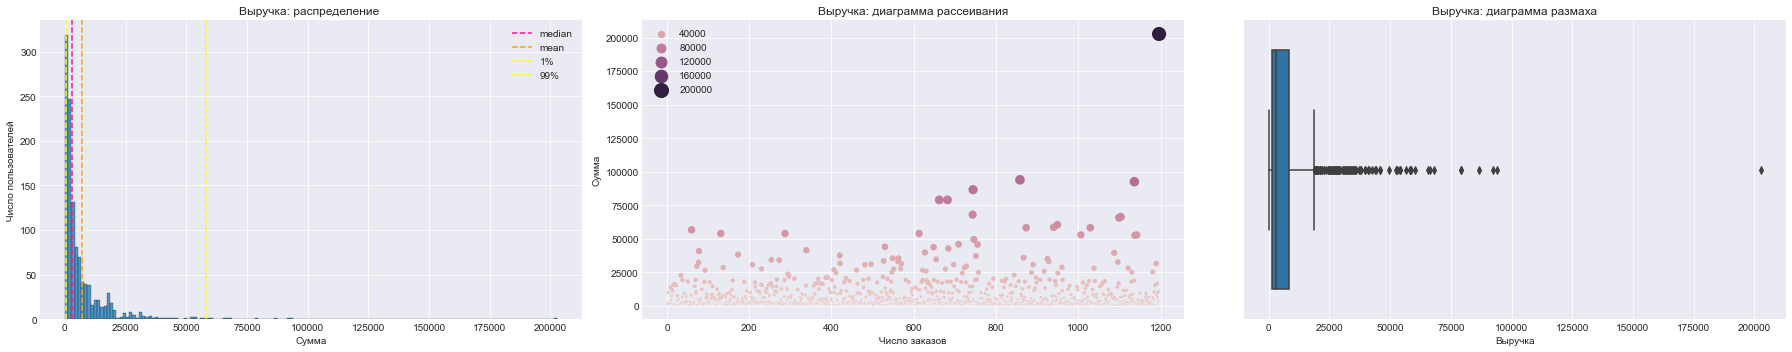

In [15]:
reporter.plotter(reporter.orders.query('revenue < 280001'), 'revenue', 'Выручка')

[В оглавление](#TOC)

## 3) Проведем статистические тесты<a class="anchor" id="3_3"></a>

In [16]:
tests_result = reporter.mannwhitneyu()

In [17]:
tests_result

,Гипотеза,p-value,alpha,p-value < alpha,Н0/Н1
0,Конверсия по сырым,0.02,0.05,True,Н1
1,Средний чек по сырым,0.73,0.05,False,Н0
2,Конверсия по очищенным,0.01,0.05,True,Н1
3,Средний чек по очищенным,0.74,0.05,False,Н0


# Чек-лист<a class='anchor' id='checklist'></a>

Часть 1. Приоритизация гипотез.
- [X] Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [X] Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [X] Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ A/B-теста
- [x] Постройте график кумулятивной выручки по группам.
- [x] Постройте график кумулятивного среднего чека по группам.
- [x] Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.
- [x] Постройте график кумулятивной конверсии по группам.
- [x] Постройте график относительного изменения кумулятивной конверсии группы B к группе A.
- [ ] Сделайте выводы и предположения.
<br></br>
- [x] Постройте точечный график количества заказов по пользователям.
- [x] Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.
- [ ] Выберите границу для определения аномальных пользователей.
- [x] Постройте точечный график стоимостей заказов.
- [x] Посчитайте 95-й и 99-й перцентили стоимости заказов.
- [ ] Выберите границу для определения аномальных заказов.
- [ ] Сделайте выводы и предположения.
<br></br>
- [x] Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
- [x] Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
- [ ] Сделайте выводы и предположения.
<br></br>
- [ ] Примите решение по результатам теста и объясните его.

[В оглавление](#TOC)